In [38]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
import mpld3

In [39]:
#f = open("/home/linus/Documents/Studium/Master/Amsterdam/Year_2/02_SoftwareEvolution/SoftwareEvolution/Series2/report.json")
f = open("/home/linus/Documents/Studium/Master/Amsterdam/Year_2/02_SoftwareEvolution/SoftwareEvolution/Series2/smallsql0.21_src.json")

parsedReport = json.load(f)

In [40]:
rows = []
clones = parsedReport["cloneClasses"]
for i, row in enumerate(clones):
    for clone in row:
        location = clone["location"]
        splt = location.split("|")
        fileLocation = splt[1]
        position = splt[2]
        rows.append([i, fileLocation, position, clone["length"]])
df = pd.DataFrame(rows, columns=["ClassIdx", "FilePath", "Position", "CloneLength"])
df

,ClassIdx,FilePath,Position,CloneLength
0,0,project://smallsql0.21_src/src/smallsql/databa...,"(2940,39,<123,20>,<126,2>)",4
1,0,project://smallsql0.21_src/src/smallsql/databa...,"(3857,39,<160,20>,<163,2>)",4
2,0,project://smallsql0.21_src/src/smallsql/databa...,"(7508,39,<288,14>,<291,2>)",4
3,1,project://smallsql0.21_src/src/smallsql/databa...,"(8394,139,<249,22>,<252,5>)",4
4,1,project://smallsql0.21_src/src/smallsql/databa...,"(7070,181,<271,34>,<274,17>)",4
...,...,...,...,...
187,76,project://smallsql0.21_src/src/smallsql/junit/...,"(5712,139,<187,18>,<192,3>)",6
188,77,project://smallsql0.21_src/src/smallsql/databa...,"(14543,60,<426,14>,<429,5>)",4
189,77,project://smallsql0.21_src/src/smallsql/databa...,"(13112,61,<367,19>,<370,5>)",4
190,78,project://smallsql0.21_src/src/smallsql/junit/...,"(11756,134,<431,18>,<435,3>)",5


In [41]:
# get clones per File and its relative number
# TODO: I could add size: number of clone classes
projectLoc = parsedReport["metaData"]["projectLoc"]
df_per_file = df.groupby("FilePath").sum(numeric_only=True).drop(axis=1, columns="ClassIdx")
df_per_file["RelativeLoc"] = df_per_file["CloneLength"].apply(lambda x: x / projectLoc)
df_per_file = df_per_file.reset_index()
df_per_file

,FilePath,CloneLength,RelativeLoc
0,project://smallsql0.21_src/src/smallsql/databa...,5,0.000208
1,project://smallsql0.21_src/src/smallsql/databa...,7,0.000291
2,project://smallsql0.21_src/src/smallsql/databa...,10,0.000416
3,project://smallsql0.21_src/src/smallsql/databa...,21,0.000874
4,project://smallsql0.21_src/src/smallsql/databa...,5,0.000208
...,...,...,...
59,project://smallsql0.21_src/src/smallsql/junit/...,48,0.001999
60,project://smallsql0.21_src/src/smallsql/junit/...,16,0.000666
61,project://smallsql0.21_src/src/smallsql/junit/...,12,0.000500
62,project://smallsql0.21_src/src/smallsql/junit/...,8,0.000333


In [42]:
paths = df_per_file["FilePath"].to_list()
cloneLength = df_per_file["CloneLength"].to_list()
relativeLocs = df_per_file["RelativeLoc"].to_list()
l = []
for p, c, r in zip(paths, cloneLength, relativeLocs):
    l.append(f"Filename: {p}<br>LOC Clones: {c}<br>Relative LOC: {(r*100):.2f}%")
    

fig, ax = plt.subplots()
p = ax.scatter(df_per_file["CloneLength"].to_list(), df_per_file["RelativeLoc"].to_list())
plt.xlabel("Absolute number clones in class (LOC)")
plt.ylabel("Relative number clones to project")

print(p)

tooltip = mpld3.plugins.PointHTMLTooltip(p, labels=l)
mpld3.plugins.connect(fig, tooltip)

mpld3.fig_to_html(fig)
mpld3.display()

In [43]:
# df where we draw lines between classes
rows = []
# for each class

df_class_size = df.groupby("ClassIdx").count().drop(axis=1, columns=["Position", "CloneLength"])
number_classes = parsedReport["metaData"]["numberCloneClasses"]

mapping = {}
for c1, c2 in itertools.combinations(df["FilePath"].unique(), 2):
    classes_c1 = df.where(df["FilePath"] == c1).dropna()["ClassIdx"].to_list()
    classes_c2 = df.where(df["FilePath"] == c2).dropna()["ClassIdx"].to_list()
    number_common_classes = len(set(classes_c1) & set(classes_c2))

    rows.append([c1, c2, number_common_classes])

df_shared_classes = pd.DataFrame(rows, columns=["File1", "File2", "SharedClasses"])
df_shared_classes

,File1,File2,SharedClasses
0,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,3
1,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,3
2,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0
3,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0
4,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/junit/...,0
...,...,...,...
2011,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0
2012,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0
2013,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0
2014,project://smallsql0.21_src/src/smallsql/databa...,project://smallsql0.21_src/src/smallsql/databa...,0


In [44]:
# stolen from https://stackoverflow.com/questions/50939065/how-to-create-a-circle-with-uniformly-distributed-dots-in-the-perimeter-of-it-wi

# and https://stackoverflow.com/questions/35363444/plotting-lines-connecting-points
files1 = df_shared_classes["File1"].unique().tolist()
files2 = df_shared_classes["File2"].unique().tolist()
allFiles = list(set(files1).union(set(files2)))
sharedClasses = df_shared_classes["SharedClasses"].unique().tolist()



fig, ax = plt.subplots(figsize=(20, 20))

n_dots = len(allFiles)   # set number of dots
angs = np.linspace(0, 2*np.pi, n_dots)  # angles to the dots
cx, cy = (50, 20)  # center of circle
xs, ys = [], []    # for coordinates of points to plot
ra = 1.0          # radius of circle





# define points
for ang in angs:
    # compute (x,y) for each point
    x = cx + ra*np.cos(ang)
    y = cy + ra*np.sin(ang)
    xs.append(x)   # collect x
    ys.append(y)   # collect y
mapping = {f : idx for f, idx in zip(allFiles, range(len(xs)))}
points = ax.scatter(xs, ys, c = 'red', s=30)

def connectpoints(x, y, p1, p2, linewidth):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    ax.plot([x1,x2],[y1,y2],'-k')

for _, row in df_shared_classes.iterrows():
    f1 = row["File1"]
    f2 = row["File2"]
    connectpoints(xs, ys, mapping[f1], mapping[f2], 8)


# assign points to class -> class to point mapping
#mapping = { f : p for p, f in zip(points, allFiles)}
# create lines
#for _, row in df_shared_classes.iterrows():
#    pass


tooltip = mpld3.plugins.PointLabelTooltip(points, files1)
mpld3.plugins.connect(fig, tooltip)

mpld3.fig_to_html(fig)
mpld3.display()

In [46]:
ax.get_lines()[0].get_data()

(array([49.01116917, 50.45621066]), array([19.85095773, 19.11012819]))

In [47]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [79]:
# 3 clusters in 2D
#d_means = {'cluster 1': [0, 0],
#           'cluster 2': [4, 5],
#           'cluster 3': [5, 0]}
#d_covs = {'cluster 1': [[1, 1],
#                        [1, 4]],
#          'cluster 2': [[1, 1],
#                        [1, 3]],
#          'cluster 3': [[4, 2],
#                        [2, 2]]}

import math
clusters = 80
cols = 10
rows = math.ceil(clusters/cols)
d_means = {}
d_covs = {}

countRow = 0
countColumn = 0
for i in range(clusters):
    d_means[f"cluster {i}"] = [countRow, countColumn]
    d_covs[f"cluster {i}"] = [[.0, .05],
                        [.05, .0]]
    #print(f"({countRow},{countColumn})")
    countColumn += 1
    if countColumn == cols:
        countRow += 1
        countColumn = 0

/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
/tmp/ipykernel_95119/3724954819.py:7: RuntimeWarning: covariance is no

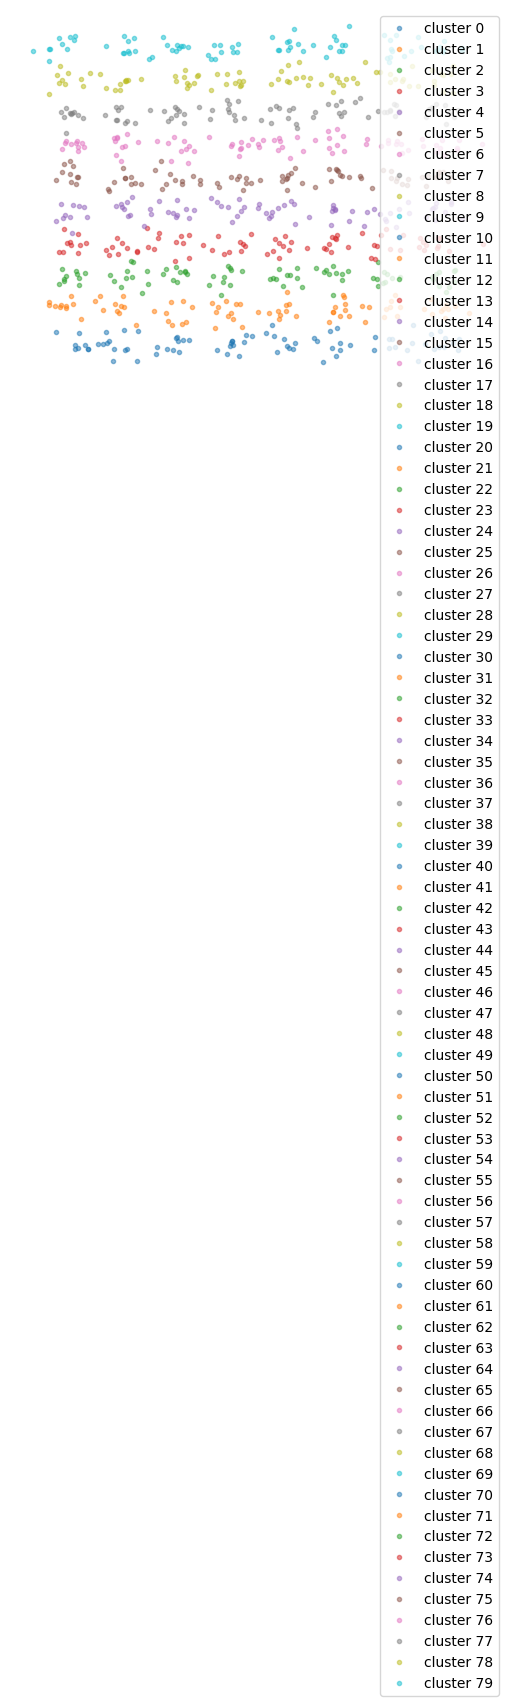

In [80]:
# Generate data based on the above parameters
n_data = 10

# Generate data based on the above parameters
l = []
for cluster in d_means.keys():
    arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data)
    df_tmp = pd.DataFrame(arr)
    df_tmp['label'] = cluster
    l.append(df_tmp)
    plt.plot(df_tmp[0], df_tmp[1], '.', label=cluster, alpha=0.5)

plt.legend()
plt.axis('off')
plt.show()